<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/03.%20Week%203/Notebook/01_BuildingSmarterModels%3AIntroduction_to_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Decision Tree without Scikit Learn

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Memuat dataset Iris
from sklearn.datasets import load_iris

# Menggunakan data Iris dari scikit-learn
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Menggabungkan data dan target untuk memudahkan manipulasi
dataset = np.column_stack((X, y))

# Menampilkan 5 baris pertama dataset Iris
print("Data Iris (5 Baris Pertama):")
print(dataset[:5])

Data Iris (5 Baris Pertama):
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


In [2]:
# Fungsi untuk menghitung Gini Impurity
def gini_impurity(labels):
    label_count = Counter(labels)
    total_samples = len(labels)
    impurity = 1 - sum((count/total_samples)**2 for count in label_count.values())
    return impurity

# Menguji fungsi gini impurity pada label dataset Iris
print("Gini Impurity Awal:", gini_impurity([row[-1] for row in dataset]))

Gini Impurity Awal: 0.6666666666666667


In [3]:
# Fungsi untuk membagi dataset berdasarkan nilai fitur
def split_dataset(dataset, feature_index, threshold):
    left = [row for row in dataset if row[feature_index] <= threshold]
    right = [row for row in dataset if row[feature_index] > threshold]
    return left, right

# Membagi dataset Iris berdasarkan fitur pertama (panjang sepal) dan threshold 5.0
left, right = split_dataset(dataset, 0, 5.0)
print("Jumlah Data di Left Split:", len(left))
print("Jumlah Data di Right Split:", len(right))

Jumlah Data di Left Split: 32
Jumlah Data di Right Split: 118


In [4]:
# Fungsi untuk menghitung Information Gain
def information_gain(left, right, parent_gini):
    total_samples = len(left) + len(right)
    weight_left = len(left) / total_samples
    weight_right = len(right) / total_samples
    gain = parent_gini - (weight_left * gini_impurity([row[-1] for row in left]) +
                          weight_right * gini_impurity([row[-1] for row in right]))
    return gain

# Menghitung information gain untuk split di fitur pertama dengan threshold 5.0
parent_gini = gini_impurity([row[-1] for row in dataset])
gain = information_gain(left, right, parent_gini)
print("Information Gain untuk Fitur 1 dengan Threshold 5.0:", gain)

Information Gain untuk Fitur 1 dengan Threshold 5.0: 0.11987994350282494


In [5]:
# Fungsi untuk mencari split terbaik
def best_split(dataset):
    best_gain = 0
    best_feature = None
    best_threshold = None
    parent_gini = gini_impurity([row[-1] for row in dataset])

    n_features = len(dataset[0]) - 1  # Jumlah fitur
    for feature_index in range(n_features):
        thresholds = set(row[feature_index] for row in dataset)
        for threshold in thresholds:
            left, right = split_dataset(dataset, feature_index, threshold)
            if len(left) == 0 or len(right) == 0:
                continue
            gain = information_gain(left, right, parent_gini)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold
    return best_feature, best_threshold

# Mencari split terbaik untuk dataset Iris
feature, threshold = best_split(dataset)
print("Fitur terbaik:", feature)
print("Threshold terbaik:", threshold)

Fitur terbaik: 2
Threshold terbaik: 1.9


In [6]:
# Fungsi untuk membuat node
class DecisionNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Fungsi untuk membangun decision tree secara rekursif
def build_tree(dataset, max_depth, depth=0):
    labels = [row[-1] for row in dataset]

    # Hentikan jika kedalaman maksimum tercapai atau jika semua label sama
    if len(set(labels)) == 1 or depth >= max_depth:
        most_common_label = Counter(labels).most_common(1)[0][0]
        return DecisionNode(value=most_common_label)

    # Mencari split terbaik
    feature, threshold = best_split(dataset)
    if feature is None:
        most_common_label = Counter(labels).most_common(1)[0][0]
        return DecisionNode(value=most_common_label)

    # Split dataset
    left, right = split_dataset(dataset, feature, threshold)

    # Membangun subtree
    left_node = build_tree(left, max_depth, depth + 1)
    right_node = build_tree(right, max_depth, depth + 1)

    return DecisionNode(feature=feature, threshold=threshold, left=left_node, right=right_node)

# Membangun pohon dengan kedalaman maksimum 3
tree = build_tree(dataset, max_depth=3)
print("Pohon Decision Tree berhasil dibangun!")

Pohon Decision Tree berhasil dibangun!


In [7]:
# Fungsi untuk melakukan prediksi menggunakan decision tree
def predict(node, sample):
    if node.value is not None:
        return node.value

    if sample[node.feature] <= node.threshold:
        return predict(node.left, sample)
    else:
        return predict(node.right, sample)

# Prediksi untuk data test
sample = [5.1, 3.5, 1.4, 0.2]  # Data sample dari kelas Setosa
print("Prediksi untuk sample:", predict(tree, sample))

Prediksi untuk sample: 0.0


In [8]:
# Fungsi untuk mencetak decision tree
def print_tree(node, spacing=""):
    # Jika node adalah daun
    if node.value is not None:
        print(spacing + "Predict", node.value)
        return

    # Cetak node dengan fitur dan threshold
    print(spacing + f"Fitur {node.feature} <= {node.threshold}")

    # Cetak subtree kiri
    print(spacing + '--> Kiri:')
    print_tree(node.left, spacing + "  ")

    # Cetak subtree kanan
    print(spacing + '--> Kanan:')
    print_tree(node.right, spacing + "  ")

# Cetak decision tree
print_tree(tree)

Fitur 2 <= 1.9
--> Kiri:
  Predict 0.0
--> Kanan:
  Fitur 3 <= 1.7
  --> Kiri:
    Fitur 2 <= 4.9
    --> Kiri:
      Predict 1.0
    --> Kanan:
      Predict 2.0
  --> Kanan:
    Fitur 2 <= 4.8
    --> Kiri:
      Predict 2.0
    --> Kanan:
      Predict 2.0


###Decision Tree with Scikit Learn

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

In [10]:
# Memuat dataset Iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Menampilkan 5 baris pertama data
print("Data Features (X):", X[:5])
print("Labels (y):", y[:5])

Data Features (X): [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels (y): [0 0 0 0 0]


In [11]:
# Membagi data menjadi train dan test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data train dan test
print("Ukuran Data Train:", X_train.shape)
print("Ukuran Data Test:", X_test.shape)

Ukuran Data Train: (120, 4)
Ukuran Data Test: (30, 4)


In [12]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(max_depth=None,criterion='entropy',random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=42)

Entropy is a measure of the randomness or impurity in a dataset. In the context of decision trees, entropy quantifies the homogeneity of a set of examples. A lower entropy means the set is more pure (i.e., contains mostly one class), while a higher entropy indicates a more mixed set.

$$
H(S) = -\sum_{i=1}^{c} p_i \log_2 p_i
$$

Where,
1. $H(S)$ is the entropy of the set $S$.
2. $p_i$ is the proportion of class $i$ in $S$.
3. $c$ is the number of classes.

Calculating the class probabilities:

$ p_A = \frac{80}{100} = 0.8 $

$ p_B = \frac{20}{100} = 0.2 $

Computing the entropy:

$$
\begin{align*}
H(S) &= - (p_A \log_2 p_A + p_B \log_2 p_B) \\
     &= - (0.8 \log_2 0.8 + 0.2 \log_2 0.2) \\
     &= - [0.8 \times (-0.3219) + 0.2 \times (-2.3219)] \\
     &= - (-0.2575 - 0.4644) \\
     &= 0.7219
\end{align*}
$$



Gini impurity measures the likelihood of incorrectly classifying a randomly chosen element if it was randomly labeled according to the distribution of labels in the subset. It ranges from 0 (pure set) to a maximum of $1 - \frac{1}{c}$, where $c$ is the number of classes.

$$
G(S) = 1 - \sum_{i=1}^{c} p_i^2
$$

Where,
1. $G(S)$ is the Gini impurity of the set $S$.
2. $p_i$ is the proportion of class $i$ in $S$.
3. $c$ is the number of classes.

Calculating the class probabilities:

$ p_A = 0.8 $

$ p_B = 0.2 $

Calculating the Gini impurity:

$$
\begin{align*}
G(S) &= 1 - (p_A^2 + p_B^2) \\
     &= 1 - (0.8^2 + 0.2^2) \\
     &= 1 - (0.64 + 0.04) \\
     &= 1 - 0.68 \\
     &= 0.32
\end{align*}
$$

A Gini impurity of $ 0.32 $ indicates that there is a 32\% chance of misclassifying a randomly chosen element.


Information Gain measures the reduction in entropy after a dataset is split on an attribute. It helps in selecting the attribute that will best separate the samples into individual classes.

$$
IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v)
$$

Where,
1. $IG(S, A)$ is the information gain of attribute $A$ on set $S$.
2. $H(S)$ is the entropy of $S$.
3. $\text{Values}(A)$ are possible values of $A$.
4. $S_v$ is the subset where $A$ has value $v$.
5. $|S|$ is the size of $S$.

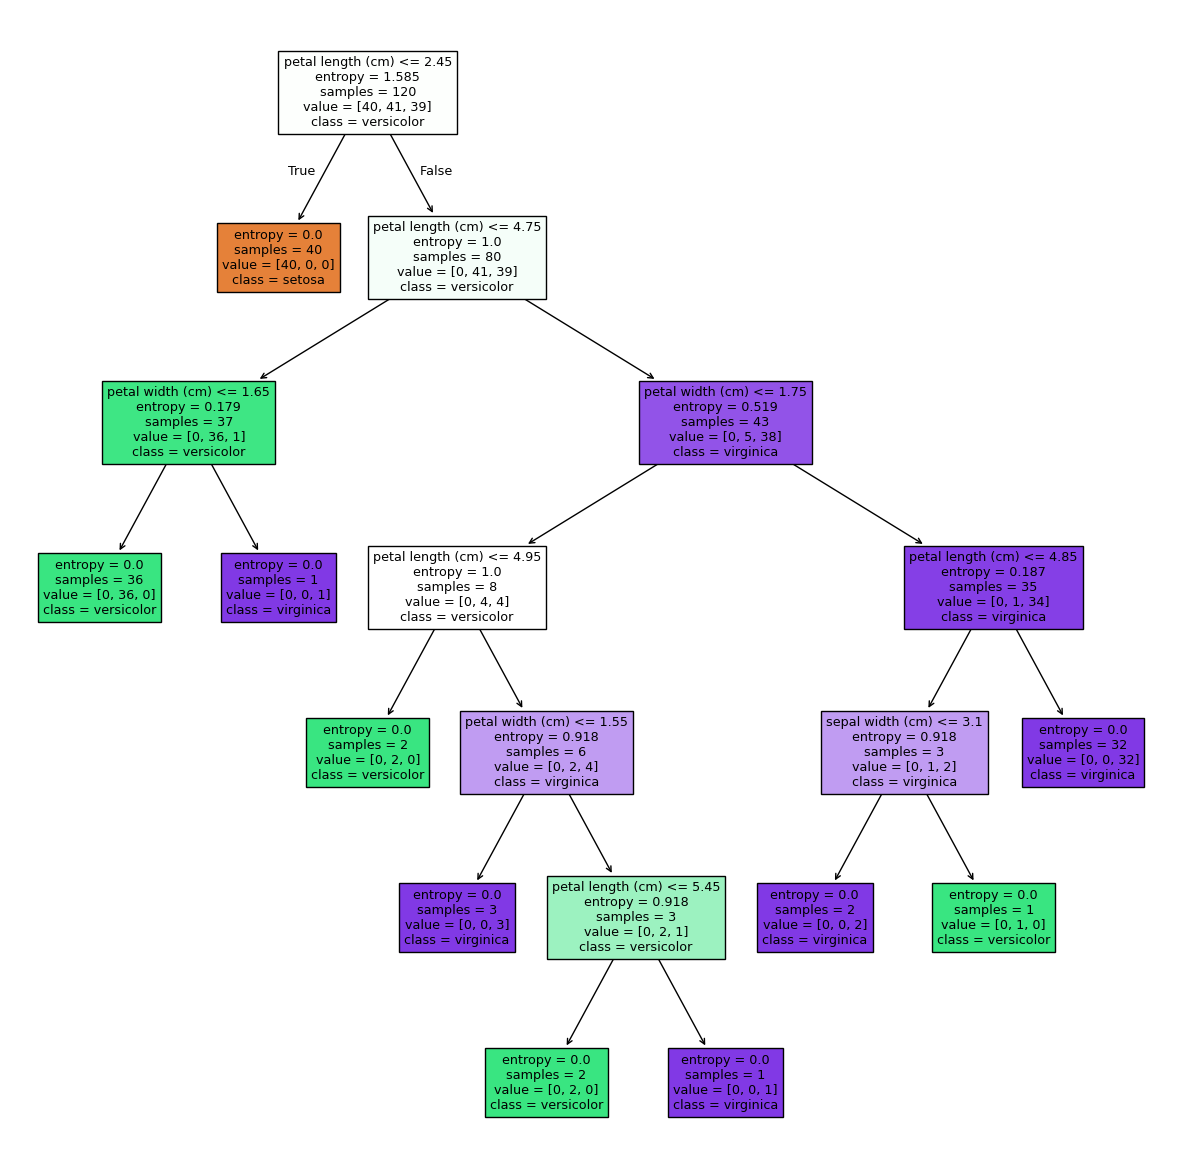

In [13]:
# Visualisasi decision tree
plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

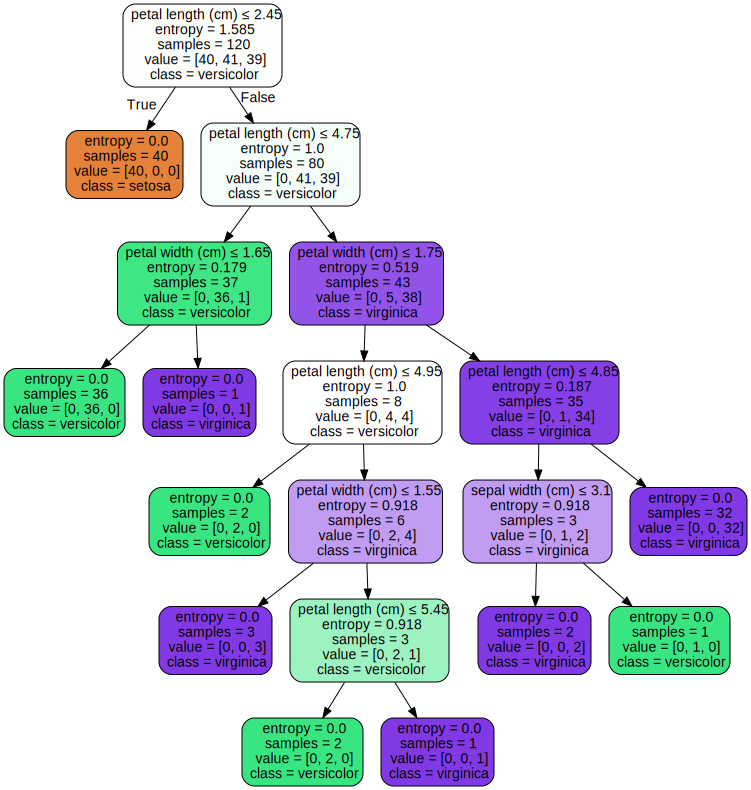

In [14]:
# Ekspor model ke format Graphviz
dot_data = export_graphviz(model, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Tampilkan tree menggunakan graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Simpan ke file
graph

In [15]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan hasil prediksi dan label sebenarnya
print("Prediksi:", y_pred)
print("Asli:", y_test)

Prediksi: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Asli: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [16]:
# Melihat akurasi pada data testing
accuracy = model.score(X_test, y_test)
print("Akurasi Model Decision Tree:", accuracy)

Akurasi Model Decision Tree: 1.0
